# Visualización de Grafos de Conocimiento (Wikidata-only)

Este notebook carga un grafo RDF (`.ttl`) generado por tu pipeline y lo **plotea** con `networkx + matplotlib`.

## 1) Configurar rutas

In [2]:
from pathlib import Path

REPO_ROOT = Path.cwd().resolve().parents[0]
GRAPHS_DIR = REPO_ROOT / "graphs" / "full"
assert GRAPHS_DIR.exists(), f"No encuentro {GRAPHS_DIR}. ¿Estás ejecutando dentro del repositorio?"

ttl_files = sorted(GRAPHS_DIR.glob("*.ttl"))
print(f"Se encontraron {len(ttl_files)} grafos en {GRAPHS_DIR}")
for p in ttl_files[:10]:
    print(" -", p.name)
TTL_FILE = ttl_files[0] if ttl_files else None
print("Usando:", TTL_FILE)


Se encontraron 495 grafos en /Users/diegolarraguibel/Desktop/Semestre 2025-2/ia generativa/historical_figures_KG/graphs/full
 - Q101740.ttl
 - Q102289.ttl
 - Q102454.ttl
 - Q1025377.ttl
 - Q1027161.ttl
 - Q1027328.ttl
 - Q1028115.ttl
 - Q103835.ttl
 - Q10390.ttl
 - Q1040253.ttl
Usando: /Users/diegolarraguibel/Desktop/Semestre 2025-2/ia generativa/historical_figures_KG/graphs/full/Q101740.ttl


## 2) Plotear el grafo

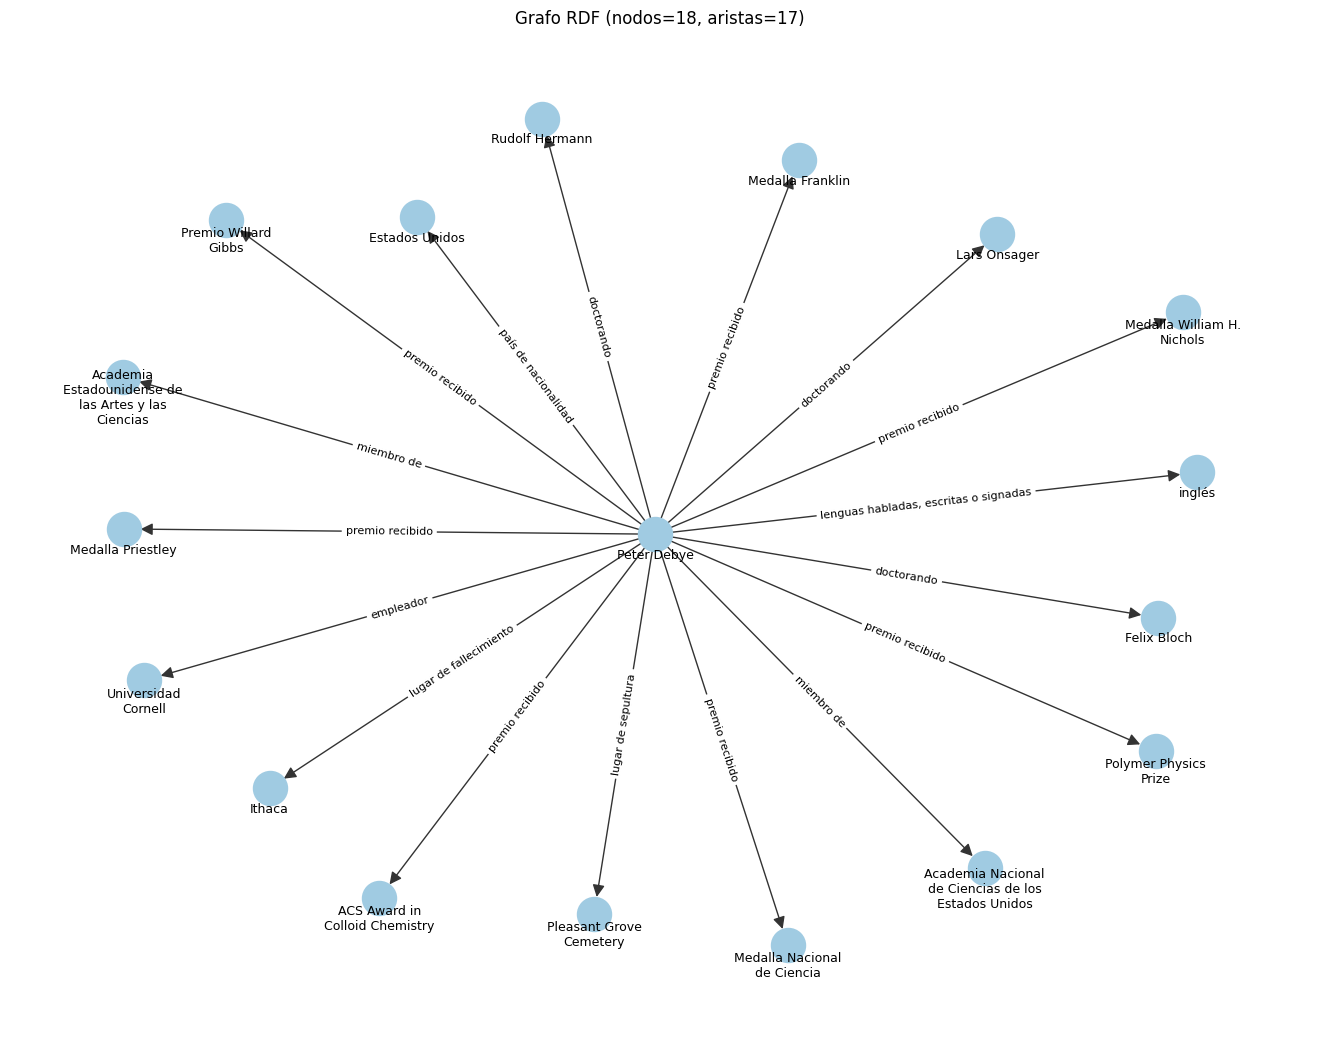

In [7]:
from kg.viz.plot_graph import plot_graph_degree1_labeled
plot_graph_degree1_labeled("graphs/full/Q103835.ttl", max_edges=40)